In [1]:
%load_ext autoreload

In [2]:
%autoreload 1

In [33]:
import glob
import itertools
import numpy as np
from rich.pretty import pprint
import matplotlib.pyplot as plt
import matplotlib
import hist
from hist import Hist
import mplhep as hep
import ROOT
import iminuit
import iminuit.cost
import iminuit.util
import uproot
import shutil

In [5]:
matplotlib.rcParams.update({'figure.max_open_warning': 0})
matplotlib.rcParams['figure.facecolor'] = 'white'
plt.style.use(hep.style.CMS)
#np.set_printoptions(suppress=True, precision=3)

In [6]:
plots = {}
plots['CR_cb'] = fit_utils.loader('CR_cb')
plots['CR_prompt'] = fit_utils.loader('CR_prompt')
plots['SR'] = fit_utils.loader('SR')

In [29]:
CRs = ['CR_cb', 'CR_prompt']
nMuons = list(range(1,5))
fits = ['prefit', 'postfit']
processes = ['QCD', 'DY', 'TT', 'VV']
nMuon_df = list(range(5))
filein_name = '../../../combine_stuff/CMSSW_11_3_4_patch1/src/plots.root'

In [135]:
plots = {}
with uproot.open(filein_name) as filein:
    for fit in fits:
        plots[fit] = {}
        for CR, nMuon in itertools.product(CRs, nMuons):
            plots[fit][f"{CR}_{nMuon}"] = {}
            for process in processes:
                plots[fit][f"{CR}_{nMuon}"][process] = {}
                for df in nMuon_df:
                    name = f"{CR}_{nMuon}_{fit}/{process}_df{df}"
                    try:
                        h_temp = filein[name].to_hist()
                        h_new = Hist.new.Reg(
                            30, 3, 500, name='Muon_pt', transform=hist.axis.transform.log
                        ).Weight()
                        for i in range(30):
                            h_new[i] = h_temp[i]
                        plots[fit][f"{CR}_{nMuon}"][process][f"{df}"] = h_new.copy()
                    except:
                        continue

In [136]:
pprint(plots)

{
│   'prefit': {
│   │   'CR_cb_1': {
│   │   │   'QCD': {
│   │   │   │   '0': Hist(Regular(30, 3, 500, transform=log, name='Muon_pt'), storage=Weight()) # Sum: WeightedSum(value=86417.6, variance=3.03059e+06),
│   │   │   │   '1': Hist(Regular(30, 3, 500, transform=log, name='Muon_pt'), storage=Weight()) # Sum: WeightedSum(value=12700, variance=193901)
│   │   │   },
│   │   │   'DY': {
│   │   │   │   '0': Hist(Regular(30, 3, 500, transform=log, name='Muon_pt'), storage=Weight()) # Sum: WeightedSum(value=1672.17, variance=159.516),
│   │   │   │   '1': Hist(Regular(30, 3, 500, transform=log, name='Muon_pt'), storage=Weight()) # Sum: WeightedSum(value=324.153, variance=9.90742)
│   │   │   },
│   │   │   'TT': {
│   │   │   │   '0': Hist(Regular(30, 3, 500, transform=log, name='Muon_pt'), storage=Weight()) # Sum: WeightedSum(value=1471.55, variance=92.0615),
│   │   │   │   '1': Hist(Regular(30, 3, 500, transform=log, name='Muon_pt'), storage=Weight()) # Sum: WeightedSum(value=63.5851, variance=0.237056)
│   │   │   },
│   │   │   'VV': {
│   │   │   │   '0': Hist(Regular(30, 3, 500, transform=log, name='Muon_pt'), storage=Weight()) # Sum: WeightedSum(value=11.8636, variance=0.00654693),
│   │   │   │   '1': Hist(Regular(30, 3, 500, transform=log, name='Muon_pt'), storage=Weight()) # Sum: WeightedSum(value=1.62283, variance=0.000203414)
│   │   │   }
│   │   },
│   │   'CR_cb_2': {
│   │   │   'QCD': {
│   │   │   │   '0': Hist(Regular(30, 3, 500, transform=log, name='Muon_pt'), storage=Weight()) # Sum: WeightedSum(value=95225, variance=3.1318e+06),
│   │   │   │   '1': Hist(Regular(30, 3, 500, transform=log, name='Muon_pt'), storage=Weight()) # Sum: WeightedSum(value=20384.8, variance=118362),
│   │   │   │   '2': Hist(Regular(30, 3, 500, transform=log, name='Muon_pt'), storage=Weight()) # Sum: WeightedSum(value=3416.22, variance=44548.7)
│   │   │   },
│   │   │   'DY': {
│   │   │   │   '0': Hist(Regular(30, 3, 500, transform=log, name='Muon_pt'), storage=Weight()) # Sum: WeightedSum(value=116.001, variance=0.674585),
│   │   │   │   '1': Hist(Regular(30, 3, 500, transform=log, name='Muon_pt'), storage=Weight()) # Sum: WeightedSum(value=18.4899, variance=0.0223259),
│   │   │   │   '2': Hist(Regular(30, 3, 500, transform=log, name='Muon_pt'), storage=Weight()) # Sum: WeightedSum(value=8.11722, variance=0.0040025)
│   │   │   },
│   │   │   'TT': {
│   │   │   │   '0': Hist(Regular(30, 3, 500, transform=log, name='Muon_pt'), storage=Weight()) # Sum: WeightedSum(value=1109.92, variance=51.7167),
│   │   │   │   '1': Hist(Regular(30, 3, 500, transform=log, name='Muon_pt'), storage=Weight()) # Sum: WeightedSum(value=110.324, variance=0.562814),
│   │   │   │   '2': Hist(Regular(30, 3, 500, transform=log, name='Muon_pt'), storage=Weight()) # Sum: WeightedSum(value=6.62246, variance=0.00174812)
│   │   │   },
│   │   │   'VV': {
│   │   │   │   '0': Hist(Regular(30, 3, 500, transform=log, name='Muon_pt'), storage=Weight()) # Sum: WeightedSum(value=0.96709, variance=3.92488e-05),
│   │   │   │   '1': Hist(Regular(30, 3, 500, transform=log, name='Muon_pt'), storage=Weight()) # Sum: WeightedSum(value=0.333618, variance=6.24005e-06),
│   │   │   │   '2': Hist(Regular(30, 3, 500, transform=log, name='Muon_pt'), storage=Weight()) # Sum: WeightedSum(value=0.0525383, variance=1.99455e-07)
│   │   │   }
│   │   },
│   │   'CR_cb_3': {
│   │   │   'QCD': {
│   │   │   │   '0': Hist(Regular(30, 3, 500, transform=log, name='Muon_pt'), storage=Weight()) # Sum: WeightedSum(value=25983, variance=284291),
│   │   │   │   '1': Hist(Regular(30, 3, 500, transform=log, name='Muon_pt'), storage=Weight()) # Sum: WeightedSum(value=9105.52, variance=81297.3),
│   │   │   │   '2': Hist(Regular(30, 3, 500, transform=log, name='Muon_pt'), storage=Weight()) # Sum: WeightedSum(value=1866.12, variance=1888.87),
│   │   │   │   '3': Hist(Regular(30, 3, 500, transform=log, name='Muon_pt'), storage=Weight()) # Sum: WeightedSum(value=373.513, variance=116.838)

In [21]:
h1 = filein['CR_cb_1_prefit/QCD_df1']

In [83]:
h1_conv = h1.to_hist()

In [113]:
h1_new = Hist.new.Reg(30, 3, 500, name='Muon_pt', transform=hist.axis.transform.log).Weight()

In [116]:
h1_new.values() = h1_conv.values()
h1_new.variances() = h1_conv.variances()

SyntaxError: cannot assign to function call (4184695557.py, line 1)

In [126]:
for i in range(30):
    h1_new[i] = h1_conv[i]

In [129]:
h1_new

Hist(Regular(30, 3, 500, transform=log, name='Muon_pt'), storage=Weight()) # Sum: WeightedSum(value=11626.9, variance=111565)

In [130]:
h1_conv

Hist(Variable(array([  20.        ,   23.31828802,   27.18712782,   31.69786385,
         36.95699595,   43.0886938 ,   50.23772863,   58.57289129,
         68.29097748,   79.62143411,   92.83177667,  108.23390531,
        126.1914689 ,  147.12845089,  171.53917972,  200.        ,
        233.18288024,  271.87127818,  316.97863849,  369.56995948,
        430.88693801,  502.3772863 ,  585.72891293,  682.90977477,
        796.21434111,  928.31776672, 1082.33905309, 1261.91468896,
       1471.28450892, 1715.39179718, 2000.        ]), name='ht'), storage=Weight()) # Sum: WeightedSum(value=11626.9, variance=111565)

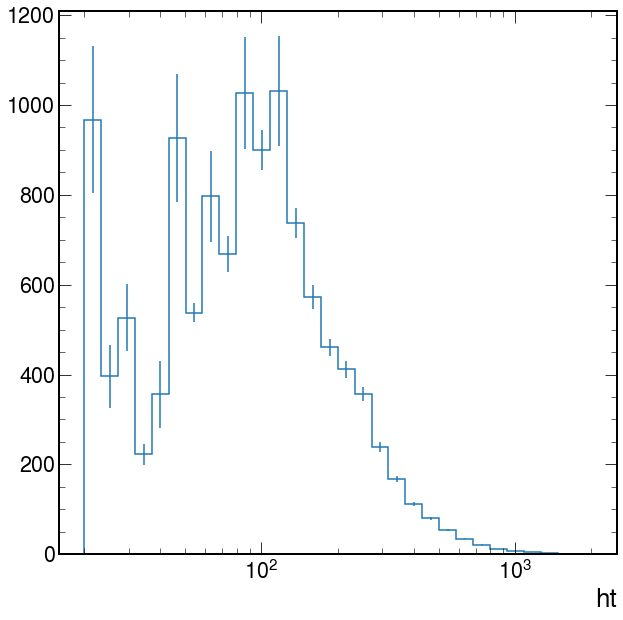

In [81]:
h1.to_hist().plot()
plt.xscale('log')

In [45]:
'CR_cb_1_prefit/QCD_df1;' in uproot.open(filein_name).keys()

True

In [23]:
regions = ['CR_prompt', 'CR_cb']
processes = {
    'VV_2018': 'VV',
    'TTJets_2018': 'TT',
    'DY_NLO_all_2018': 'DY',
    'QCD_Pt_MuEnriched_2018': 'QCD',
}
signal = {
    'SUEP-m125-darkPho_2018': 'SUEP125',
}
data = 'DoubleMuon+Run2018A-UL2018_MiniAODv2-v1+MINIAOD_histograms_2018'
histogram = 'muon_pt'

with uproot.recreate('SUEP.root') as file:
    for region in regions:
        for nMuon in range(1,5):
            file[f'{region}_{nMuon}/data_obs'] = plots[region][data][histogram][:, ::sum, ::sum, nMuon*1j]
            for p in processes.keys():
                tmp_plot = plots[region][p][histogram].copy()
                value_is_negative = tmp_plot.values() < 0
                tmp_plot.variances()[value_is_negative] = 0
                tmp_plot.values()[value_is_negative] = 0
                low_unc_is_negative = (tmp_plot.values() - np.sqrt(tmp_plot.variances())) < 0
                tmp_plot.variances()[low_unc_is_negative] = (tmp_plot.values()[low_unc_is_negative])**2
                for df in range(5):
                    name = f'{region}_{nMuon}/{processes[p]}_df{df}'
                    file[name] = tmp_plot[:, ::sum, df*1j, nMuon*1j]
            for s in signal.keys():
                name = f'{region}_{nMuon}/{signal[s]}'
                file[name] = plots[region][s][histogram][:, ::sum, ::sum, nMuon*1j]                    

In [24]:
shutil.copy2('SUEP.root', '../../../combine_stuff/CMSSW_11_3_4_patch1/src/auxiliaries/')

'../../../combine_stuff/CMSSW_11_3_4_patch1/src/auxiliaries/SUEP.root'

In [24]:
pprint([p for p in plots['CR_cb'].keys() if 'SUEP' in p])

[
│   'SUEP-m125-darkPho_2018',
│   'SUEP-m125-darkPhoHad_2018',
│   'SUEP-m400-darkPho_2018',
│   'SUEP-m400-darkPhoHad_2018',
│   'SUEP-m750-darkPho_2018',
│   'SUEP-m750-darkPhoHad_2018',
│   'SUEP-m1000-darkPho_2018',
│   'SUEP-m1000-darkPhoHad_2018'
]

In [25]:
plots['CR_cb']

{'SUEP-m125-darkPho_2018': {'ht': Hist(
    Regular(30, 20, 2000, transform=log, name='ht'),
    Regular(8, 0, 8, name='nMuon_ndf'),
    Regular(8, 0, 8, name='nMuon'),
    storage=Weight()) # Sum: WeightedSum(value=1435.2, variance=3751.89) (WeightedSum(value=1526.7, variance=3991.12) with flow),
  'muon_pt': Hist(
    Regular(30, 3, 500, transform=log, name='Muon_pt'),
    IntCategory([0, 1, 3, 4, 5, 15], name='Muon_genPartFlav'),
    Regular(8, 0, 8, name='nMuon_ndf'),
    Regular(8, 0, 8, name='nMuon'),
    storage=Weight()) # Sum: WeightedSum(value=148.968, variance=389.328),
  'muon_eta': Hist(
    Regular(20, -2.4, 2.4, name='Muon_eta'),
    IntCategory([0, 1, 3, 4, 5, 15], name='Muon_genPartFlav'),
    Regular(8, 0, 8, name='nMuon_ndf'),
    Regular(8, 0, 8, name='nMuon'),
    storage=Weight()) # Sum: WeightedSum(value=148.968, variance=389.328)},
 'SUEP-m125-darkPhoHad_2018': {'ht': Hist(
    Regular(30, 20, 2000, transform=log, name='ht'),
    Regular(8, 0, 8, name='nMuon_ndf

In [20]:
print(
    plots['CR_prompt']['TTJets_2018']['ht'][:, 0, 1j].values() 
    - np.sqrt(plots['CR_prompt']['TTJets_2018']['ht'][:, 0, 1j].variances())
)

[ 0.00000000e+00  2.51416005e-03  6.65469648e-03  3.59545374e-03
 -1.23306712e-02  1.71677587e-02  1.08872562e-01  3.14947039e-01
  5.13441715e-01  1.12028571e+00  2.80772109e+00  6.17545061e+00
  1.44873717e+01  2.91528444e+01  5.03854932e+01  7.73484293e+01
  1.02568188e+02  1.14047898e+02  1.10359653e+02  9.06991891e+01
  6.68028686e+01  4.73662692e+01  3.30325222e+01  2.02116124e+01
  1.27265536e+01  7.12093780e+00  4.03206648e+00  2.14637906e+00
  7.89864985e-01  5.13965307e-01]
